## Pandas: Conociendo la biblioteca.
### Aula 2: Análisis exploratorio de los datos.

El equipo de ML ha llegado con algunas demandas de última hora que debemos resolver en este momento de análisis exploratorio. Estas demandas son las siguientes:

1. Calcular el promedio de habitaciones por departamento.
2. Verificar cuántas colonias únicas existen en nuestra base de datos.
3. Analizar qué colonias tienen el promedio de alquiler más alto.
4. Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.


In [2]:
import pandas as pd

url = '../../data/alquiler.csv'
datos = pd.read_csv(url, sep=";")
datos

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN


1. Calcular el promedio de habitaciones por departamento.

In [4]:
# 1. Filtramos solo las filas donde el tipo es "Departamento"
solo_dptos = datos[datos["Tipo"] == "Departamento"]
solo_dptos

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [8]:
# Calculamos el promedio de la columna Habitaciones
promedio_habitaciones = solo_dptos["Habitaciones"].mean()

# Redondeamos como variable en python
round(float(promedio_habitaciones), 1)

2.5

2. Verificar cuántas colonias únicas existen en nuestra base de datos.

In [ ]:
# Utilizamos una variante de unique, que es el método nunique() que
# enumera los valores únicos 
# ('n' = number + 'unique' = unicos) = nunique()
colonias_unicas = datos["Colonia"].nunique()

colonias_unicas

88

3. Analizar qué colonias tienen el promedio de alquiler más alto.

In [14]:
# Agrupamos por colonia y calculamos el promedio de la columna Valor
promedios_colonias = datos.groupby("Colonia")["Valor"].mean()
promedios_colonias

Colonia
Ajusco                 20504.166667
Arboledas               6173.924731
Atlalilco               5705.000000
Atlampa                 6607.500000
Barrio Bravo           36253.636364
                          ...      
Villa de Cortés       135737.411765
Villa de Guadalupe     14326.564189
Xochimilco             32025.000000
Zacatenco               5176.250000
Álvaro Obregón          3048.281250
Name: Valor, Length: 88, dtype: float64

In [15]:
# Ordenar de mayor a menor
promedio_colonias_desc = promedios_colonias.sort_values(ascending=False)
round(promedio_colonias_desc, 1)

Colonia
San Juan Xalpa          420926.7
Nativitas               244684.4
La Merced               213292.8
Santa Marta Acatitla    166048.1
Villa de Cortés         135737.4
                          ...   
Álvaro Obregón            3048.3
San José Insurgentes      2660.0
El Rodeo                  2586.1
Tláhuac                   2481.8
Las Aguilas               2222.5
Name: Valor, Length: 88, dtype: float64

4. Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.

In [17]:
# Tomamos las 5 colonias con el mayor promedio de alquiler
top5 = promedio_colonias_desc.head(5)
round(top5, 1)

Colonia
San Juan Xalpa          420926.7
Nativitas               244684.4
La Merced               213292.8
Santa Marta Acatitla    166048.1
Villa de Cortés         135737.4
Name: Valor, dtype: float64

<Axes: xlabel='Valor', ylabel='Colonia'>

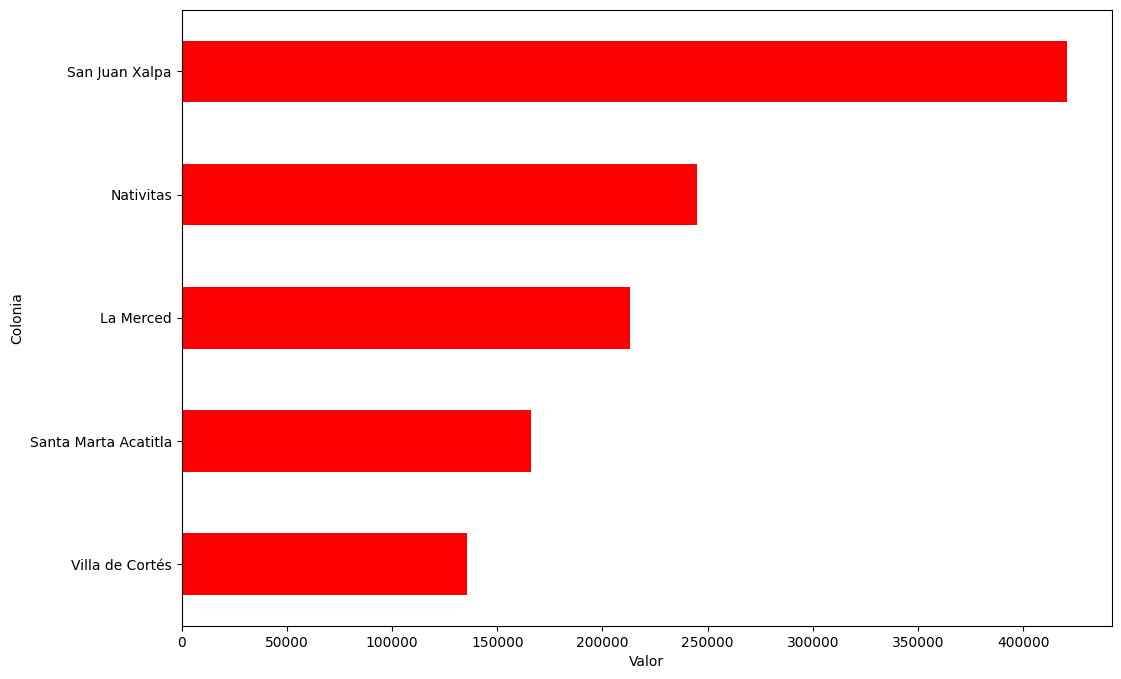

In [ ]:
# Graficamos en barras horizontales
# el inciso [::-1] le indica a la librería que debe mostrar
# el orden de mayor a menor
top5[::-1].plot(kind='barh', figsize=(12, 8), color="red", xlabel='Valor', ylabel='Colonia')